## Walkthrough notebook for the Simple Solver
Perform rotation and offset corrections on the reference 2D trace profiles and wavelength maps to match an input GR700XD/CLEAR dataframe.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
ss_path = '/Users/michaelradica/Documents/GitHub/jwst-mtl/'
sys.path.insert(0, ss_path)
from SOSS.extract.simple_solver import simple_solver as ss
from SOSS.trace import contaminated_centroids as ctd

Use the CV3 CLEAR deepstack as a test case.

(0, 256)

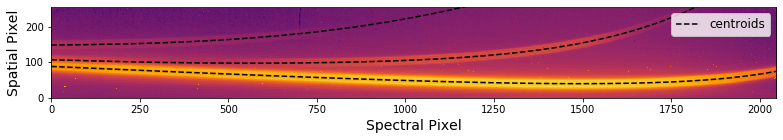

In [2]:
# Open the CV3 SUBSTRIP256 CLEAR exposure.
filepath = '/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/Input_Files/'
clear = fits.open(filepath+'cv3_clear.fits')[0].data[::-1]

# Fix NaN edge columns
for i in range(4):
    clear[:, i] = clear[:, 4]
    clear[:, 2044+i] = clear[:, 2043]

# Create bad pixel mask.
badpix = np.isnan(clear)
# Fill in bad pixels, for display purposes.
clear[np.where(clear<0)] = np.nanpercentile(np.abs(clear), 5)
inds = np.where(np.isnan(clear))
clear[inds] = np.tile(np.nanmean(clear, axis=1), (2048, 1)).T[inds]

# Show the resulting frame
plt.figure(figsize=(13, 5))
plt.imshow(np.log10(clear), origin='lower', cmap='inferno')

# Verify the centroiding algorithm
cen_dict = ctd.get_soss_centroids(clear, badpix=badpix, subarray='SUBSTRIP256')
plt.plot(cen_dict['order 1']['X centroid'], cen_dict['order 1']['Y centroid'],
         c='black', ls='--', label='centroids')
plt.plot(cen_dict['order 2']['X centroid'], cen_dict['order 2']['Y centroid'],
         c='black', ls='--')
plt.plot(cen_dict['order 3']['X centroid'], cen_dict['order 3']['Y centroid'],
         c='black', ls='--')

plt.xlabel('Spectral Pixel', fontsize=14)
plt.ylabel('Spatial Pixel', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.ylim(0, 256)

### SUBSTRIP256

The functionality of the simple solver is accessed through the ```simple_solver``` function.

Toggle ```save_to_file=True``` to write the transformed reference files to disk. 

The simple_solver can also take a bad pixel map using the ```badpix``` argument.


There are three possible verbose levels: 1 shows only progress prints, whereas level 2 also displays diagnostic plots. Level 0 turns all verbose behaviour off. 

In [3]:
# Run the simple solver on the CV3 data.
trace_prof, wavemap = ss.simple_solver(clear, verbose=1, save_to_file=False)

Starting the simple solver algorithm.
  Reading reference files...
  Getting centroids...
  Transforming reference files...
Done.


The simple solver returns two 3D numpy arrays; one for the 2D trace profile, and the other for the 2D wavelength map. The first dimension of each array is the spectral order, the second dimension is the spatial axis, and the third is the spectral axis. If written to disk, each array is saved to a seperate multi-extension fits file.


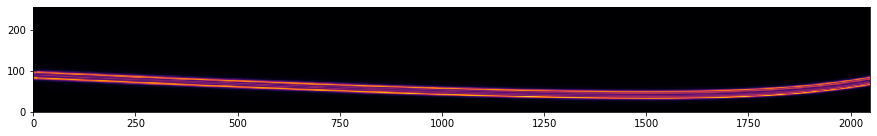

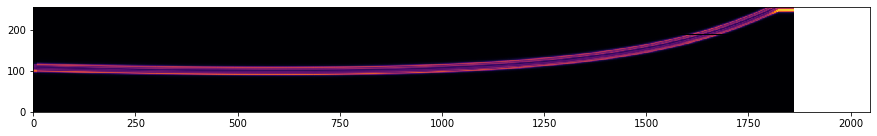

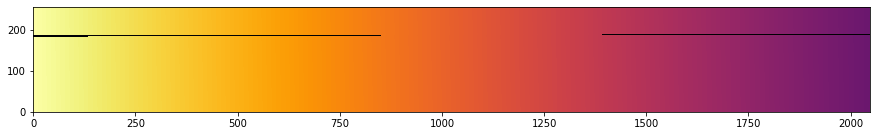

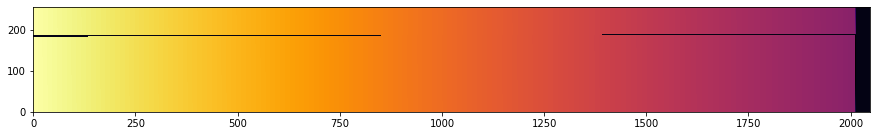

In [4]:
# Display the transformed reference files.
plt.figure(figsize=(15, 3))
plt.imshow(trace_prof[0, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(15, 3))
plt.imshow(trace_prof[1, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(15, 3))
plt.imshow(wavemap[0, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(15, 3))
plt.imshow(wavemap[1, :, :], origin='lower', cmap='inferno')

The dark lines in the last three frames are due to insufficient padding in the reference files, not a problem with the algorithm.

### SUBSTRIP96

Text(0, 0.5, 'Spatial Pixel')

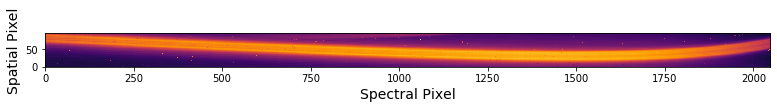

In [5]:
# Trim SUBSTRIP256 CV3 data to SUBSTRIP96.
clear96 = clear[10:-150, :]*1

plt.figure(figsize=(13, 5))
plt.imshow(np.log10(clear96), origin='lower', cmap='inferno')

plt.xlabel('Spectral Pixel', fontsize=14)
plt.ylabel('Spatial Pixel', fontsize=14)

In [6]:
# The simple solver determines the correct subarray based on the dimensions of the input data.
trace, wave = ss.simple_solver(clear96, verbose=1, save_to_file=False)

Starting the simple solver algorithm.
  Reading reference files...
  Getting centroids...
  Transforming reference files...
Done.


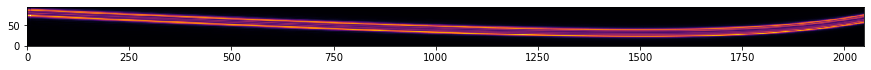

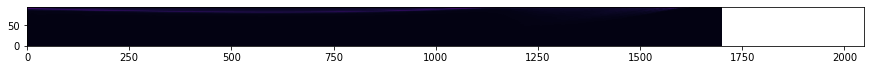

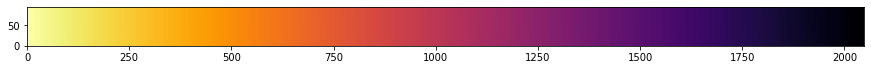

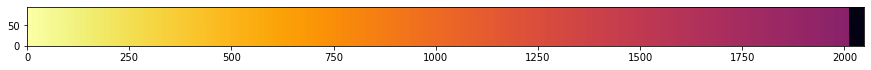

In [7]:
plt.figure(figsize=(15, 3))
plt.imshow(trace[0, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(15, 3))
plt.imshow(trace[1, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(15, 3))
plt.imshow(wave[0, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(15, 3))
plt.imshow(wave[1, :, :], origin='lower', cmap='inferno')

### FULL

Text(0, 0.5, 'Spatial Pixel')

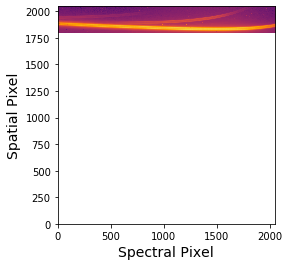

In [8]:
# Extend the SUBSTRIP256 CV3 data to the dimensions of FULL.
clearFULL = np.zeros((2048, 2048))
clearFULL[-256:, :] = clear

plt.imshow(np.log10(clearFULL), origin='lower', cmap='inferno')

plt.xlabel('Spectral Pixel', fontsize=14)
plt.ylabel('Spatial Pixel', fontsize=14)

In [9]:
trace, wave = ss.simple_solver(clearFULL, verbose=1, save_to_file=False)

Starting the simple solver algorithm.
  Reading reference files...
  Getting centroids...
  Transforming reference files...
Done.


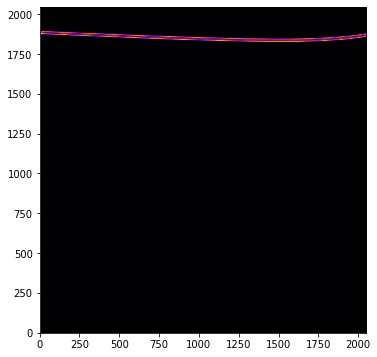

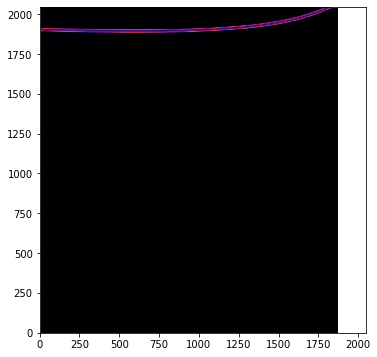

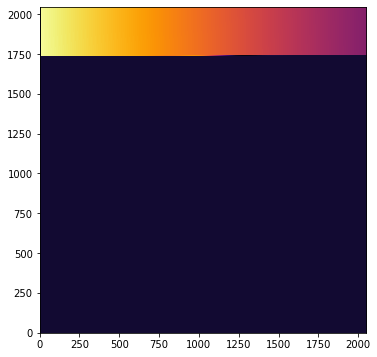

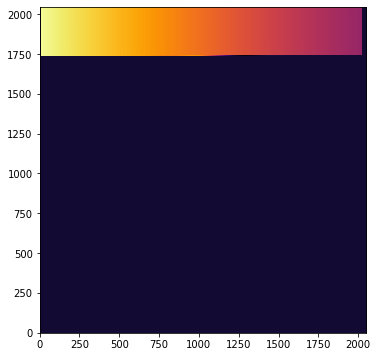

In [10]:
plt.figure(figsize=(6, 6))
plt.imshow(trace[0, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(6, 6))
plt.imshow(trace[1, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(6, 6))
plt.imshow(wave[0, :, :], origin='lower', cmap='inferno')

plt.figure(figsize=(6, 6))
plt.imshow(wave[1, :, :], origin='lower', cmap='inferno')